In [5]:
import numpy as np
from matplotlib import pyplot as plt
from typing import List

#  fonction recevant une liste de couples (xi,yi) ainsi qu'une liste d'abscisses αi et qui renvoie la liste des valeurs P(αi), P étant le polynôme d'interpolation construit sur les points (xi,yi).

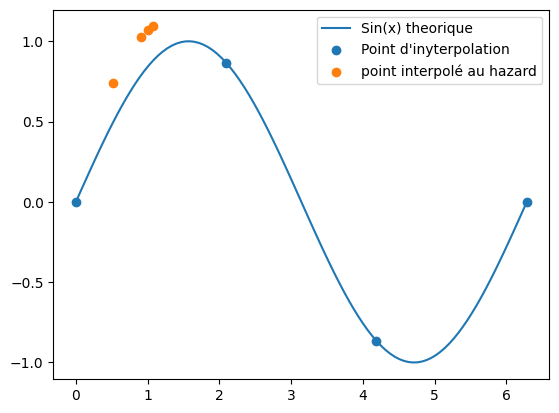

In [6]:
cluster = [(1, 2), (2, 4), (3, 6)]

def interpolate_lagrange(alpha: float, cluster : List[tuple]):
    x = [i[0] for i in cluster]
    y = [i[1] for i in cluster]
    if type(alpha) not in [int, float, np.float64]:
        approx = np.zeros(len(alpha))
    else:
        approx = 0
    for j in range(len(x)):
        l = np.prod([(alpha - x[i])/(x[j] - x[i]) for i in range(len(x)) if x[i] != x[j]]) 
        approx += l*y[j]
    return approx
alpha = np.array([1, 2])



x = np.linspace(0, 2*np.pi, 4)
point = [(xi, np.sin(xi) ) for xi in x]

xx = np.linspace(0, 2*np.pi, 100)

y = [interpolate_lagrange(xi,point) for xi in x]
yy = np.sin(xx)

x_random = np.random.rand(4)*2*np.pi
y_interpolate_lagrange = [interpolate_lagrange(xi, point) for xi in x_random]

plt.figure()
plt.plot(xx, yy, label="Sin(x) theorique")
plt.scatter(x, y, label="Point d'inyterpolation")
plt.scatter(x_random, y_interpolate_lagrange, label="point interpolé au hazard")

plt.legend()
plt.show()

Implantez cette même fonction par le biais de la méthode barycentrique et comparez les deux méthodes en termes de vitesses d'exécution avec des listes αi conséquentes.

In [18]:
def barycentric_interpolation(alpha, cluster):
    x = np.array([i[0] for i in cluster])
    y = np.array([i[1] for i in cluster])
    # def Ai(xix):
    #     return np.array([np.prod([1/(xi -xj) for xj in x if xi!= xj]) for ])

    Ai = np.array([np.prod([1/(xi -xj) for xj in x if xi!= xj]) for xi in x])
   
    num = np.sum([y * Ai/(alpha - x)])
    den = np.sum(Ai/(alpha - x))
    return num/den
    

barycentric_interpolation(2.5, cluster)

4.999999999999999

# Les (𝑥𝑖,𝑦𝑖) sont intégrés au calcul dans un ordre aléatoire (éventuellement celui fourni par l'utilisateur)

In [25]:
n = len(cluster)
memory = np.zeros((n, n))

In [28]:

def atiken_methode(alpha,cluster,  tolerance):
    n = memory.shape[0]
    for i in range(n):
        memory[i, 0] = cluster[i][1]
    
    iterations = 0
    values = []
    for j in range(1, n):
        for i in range(n - j):
            xi, xj = cluster[i][0], cluster[i + j][0]
            memory[i, j] = ((alpha - xj) * memory[i, j - 1] - (alpha - xi) * memory[i + 1, j - 1]) / (xi - xj)
            values.append(memory[i, j])
            iterations += 1
            
            if j > 1 and np.all(np.abs(memory[i, j] - memory[i, j-1]) < tolerance):
                return values[0]
    
    return values[0]

atiken_methode(2.5, cluster, 0.1)

5.0